# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Estatística para Ciência de Dados</span>

## <span style="color:blue">Avaliação Final</span>

Aluno: Benicio Ramos Magalhaes

**Material Produzido por Mariana Cúri**<br>
**Cemeai - ICMC/USP São Carlos**

<font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>

Os dados do arquivo Brain, em anexo, referem-se ao peso do cérebro (g), tamanho da cabeça (cm3) de 237 adultos, identificados por sexo e grupo etário. O estudo teve por objetivo verificar se:

<b>1) Há diferença no peso cerebral entre os sexos? E entre os grupos etários?

2) O tamanho da cabeça é preditor do peso cerebral e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários?

3) Estime o peso médio do cérebro de homens e de mulheres (pontual e intervalar).</b>

Interprete seus resultados e verifique se as suposições dos métodos são adequadas a estes dados.

Se uma das suas respostas (aos itens 1, 2 ou 3) aplicar, além da estatística clássica, também a inferencial (de maneira adequada, claro), sua nota será acrescida de 1 ponto (ou seja, sua prova fica valendo 11 pontos).

O formato de entrega será de dois arquivos: 

1 PDF, com os resultados resumidos e comentados
e outro em Jupyter Notebook, com os códigos usados para a obtenção dos resultados. Este notebook, deve ser comentado de forma a facilmente identificar os códigos de cada análise.

In [277]:
#bibliotecas
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy.stats import t
from scipy.stats import f
from scipy.stats import sem
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import probplot
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [175]:
#carregando dados originais

data = pd.read_csv('.\data\Brain.csv')
data.describe()

,Homem,Acima45,Tamanho,Peso
count,237.000000,237.000000,237.000000,237.000000
mean,0.565401,0.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,0.000000,0.000000,2720.000000,955.000000
25%,0.000000,0.000000,3389.000000,1207.000000
50%,1.000000,1.000000,3614.000000,1280.000000
75%,1.000000,1.000000,3876.000000,1350.000000
max,1.000000,1.000000,4747.000000,1635.000000


In [185]:
#separando as variáveis

#series de peso
peso_homem = data['Peso'][data['Homem']==1]
peso_mulher = data['Peso'][data['Homem']==0]
peso_idade_maior45 = data['Peso'][data['Acima45']==1]
peso_idade_menor45 = data['Peso'][data['Acima45']==0]

### 1) Há diferença no peso cerebral entre os sexos? E entre os grupos etários?

Como o objetivo é comparar duas populações com relação a uma variável quantitativa (peso cerebral) baseado numa amostra, o ideal é usarmos um teste de hipótese. Portanto, iremos verificar se existe diferença no peso cerebral entre os sexos aplicando um teste de hipótese para igualdade das médias. 

Para isto, algumas suposições que devemos verificar: 
* Se existe ou não dependência entre as amostras (medições pareadas ou não pareadas)
* Se os dados seguem uma distribuição normal.

OBS: Após análise para os sexos, iremos fazer a mesma análise para faixa etária.

#### Passos para o teste de hipótese:

###### a) Especificar as hipóteses H$_0$ e H$_a$;
<font color='blue'><b>
H$_0$: $\mu_1$ = $\mu_2$ -> Peso cerebral do homem é igual ao peso cerebral da mulher (hipótese nula) <br>
H$_a$: $\mu_1$ $\neq$ $\mu_2$ -> Peso cerebral do homem não é igual ao peso cerebral da mulher (hipótese alternativa)<br>
</font></b>
###### b) Especificar a estatística do teste e sua distribuição, sob H$_0$;

In [3]:
print('Estatística dos dados para Homem:')
peso_homem.describe()

Estatística dos dados para Homem:


count     134.000000
mean     1331.858209
std       108.933390
min      1120.000000
25%      1252.750000
50%      1313.500000
75%      1400.000000
max      1635.000000
Name: Peso, dtype: float64

In [4]:
print('Estatística dos dados para Mulher:')
peso_mulher.describe()

Estatística dos dados para Mulher:


count     103.000000
mean     1219.145631
std       103.829933
min       955.000000
25%      1146.000000
50%      1220.000000
75%      1290.000000
max      1520.000000
Name: Peso, dtype: float64


Vamos verificar a normalidade da distribuição com a realização de alguns testes.<br>

Vamos considerar os seguintes testes para distribuição normal:<br>
* Kolmogorov-Smirnov
* Anderson-Darling
* Shapiro-Wilk

In [5]:
#Teste de Kolmogorov-Smirnov:

ks_stat_homem, ks_p_homem = kstest(peso_homem,'norm',args=(peso_homem.describe()[1],peso_homem.describe()[2]),N=len(peso_homem))
ks_stat_mulher, ks_p_mulher = kstest(peso_mulher,'norm',args=(peso_mulher.describe()[1],peso_mulher.describe()[2]),N=len(peso_mulher))

#para número da amostra > 50:
ks_val_homem = 1.36/(np.sqrt(len(peso_homem)))
ks_val_mulher = 1.36/(np.sqrt(len(peso_mulher)))

ks_res_homem = 'Distribuição é normal' if ks_val_homem >= ks_stat_homem else 'Distribuição NÃO é normal'
ks_res_mulher = 'Distribuição é normal' if ks_val_mulher >= ks_stat_mulher else 'Distribuição NÃO é normal'

In [6]:
#Teste Anderson-Darling:

ad_stat_homem, ad_p_homem, ad_ic_homem = anderson(peso_homem,'norm')
ad_stat_mulher, ad_p_mulher, ad_ic_mulher = anderson(peso_mulher,'norm')

#para ic 5%
ad_res_homem = 'Distribuição é normal' if ad_stat_homem < ad_p_homem[2] else 'Distribuição NÃO é normal'
ad_res_mulher = 'Distribuição é normal' if ad_stat_mulher < ad_p_mulher[2] else 'Distribuição NÃO é normal'

In [7]:
#Teste de Shapiro-Wilk:

sh_stat_homem, sh_p_homem = shapiro(peso_homem)
sh_stat_mulher, sh_p_mulher = shapiro(peso_mulher)

#para ic 5%
sh_res_homem = 'Distribuição é normal' if sh_p_homem > 0.05 else 'Distribuição NÃO é normal'
sh_res_mulher = 'Distribuição é normal' if sh_p_mulher > 0.05 else 'Distribuição NÃO é normal'

In [8]:
#Resultados dos testes de normalidade HOMEM
print('Resultados dos testes de normalidade para homem:')
print()
print('|----------Teste----------|----------Estatística--------|----------P-Valor----------|----------Resultado (IC 5%)----------|')
print('|    Kolmogorov-Smirnov   |','   ',ks_stat_homem,'    |','   ',ks_p_homem,'   |','       ',ks_res_homem,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Anderson-Darling     |','   ',ad_stat_homem,'     |','   ',ad_p_homem[2],'                |','       ',ad_res_homem,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Shapiro-Wilk         |','   ',sh_stat_homem,'     |','   ',sh_p_homem,'  |','       ',sh_res_homem,'  |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')

Resultados dos testes de normalidade para homem:

|----------Teste----------|----------Estatística--------|----------P-Valor----------|----------Resultado (IC 5%)----------|
|    Kolmogorov-Smirnov   |     0.07319296053954616     |     0.4535070134115867    |         Distribuição é normal       |
|-------------------------|-----------------------------|---------------------------|-------------------------------------|
|    Anderson-Darling     |     0.7592588134145046      |     0.765                 |         Distribuição é normal       |
|-------------------------|-----------------------------|---------------------------|-------------------------------------|
|    Shapiro-Wilk         |     0.9780169129371643      |     0.02875436283648014   |         Distribuição NÃO é normal   |
|-------------------------|-----------------------------|---------------------------|-------------------------------------|


O resultado de 2 testes foram favoráveis a dizer que os dados tem distribuição normal dado o intervalo de confiança de 5%.
Assim, iremos considerar o peso para homem com uma distribuição normal gaussiana.

In [9]:
#Resultados dos testes de normalidade MULHER
print('Resultados dos testes de normalidade para mulher:')
print()
print('|----------Teste----------|----------Estatística--------|----------P-Valor----------|----------Resultado (IC 5%)----------|')
print('|    Kolmogorov-Smirnov   |','   ',ks_stat_mulher,'    |','   ',ks_p_mulher,'   |','       ',ks_res_mulher,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Anderson-Darling     |','   ',ad_stat_mulher,'    |','   ',ad_p_mulher[2],'                |','       ',ad_res_mulher,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Shapiro-Wilk         |','   ',sh_stat_mulher,'     |','   ',sh_p_mulher,'   |','       ',sh_res_mulher,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')

Resultados dos testes de normalidade para mulher:

|----------Teste----------|----------Estatística--------|----------P-Valor----------|----------Resultado (IC 5%)----------|
|    Kolmogorov-Smirnov   |     0.04574294927683009     |     0.9823678682451854    |         Distribuição é normal       |
|-------------------------|-----------------------------|---------------------------|-------------------------------------|
|    Anderson-Darling     |     0.14292747443232656     |     0.759                 |         Distribuição é normal       |
|-------------------------|-----------------------------|---------------------------|-------------------------------------|
|    Shapiro-Wilk         |     0.9959982633590698      |     0.9919323921203613    |         Distribuição é normal       |
|-------------------------|-----------------------------|---------------------------|-------------------------------------|


Os resultados de todos os testes foram favoráveis a dizer que os dados tem distribuição normal dado o intervalo de confiança de 5%. Assim, iremos considerar o peso para mulher com uma distribuição normal gaussiana.

Considerando a natureza dos dados, as medições sugerem que as amostras são independentes, pois a medição do peso do cérebro são feitos em indivíduos diferentes e, portanto, não aparentam ter relação de dependência. Para fundamentarmos melhor essa afirmação, iremos realizar um teste Z para a hipótese nula de que a média das amostras são iguais.

In [280]:
#teste Z de dependência

#para este caso vamos considerar peso como uma variável quantitativa e compará-la entre os dois sexos.
stat_peso_homem = [np.mean(peso_homem),np.std(peso_homem),np.std(peso_homem)**2]
stat_peso_mulher = [np.mean(peso_mulher),np.std(peso_mulher),np.std(peso_mulher)**2]

#valor da estatística do teste
Z = (stat_peso_homem[0]-stat_peso_mulher[0])/(math.sqrt((stat_peso_homem[2])/ math.sqrt(len(peso_homem)+len(peso_mulher))))  # estatístiva do teste Z

z_pc = norm.ppf(0.05)  #cálculo do ponto crítico (x_corte)
z_pvalor = norm.cdf(Z)  #cálculo do p-valor


z_res = 'Amostras independentes' if z_pvalor > 0.05 else 'Amostras dependentes'

print('Resultado:',z_pvalor)
print(z_res)

Resultado: 0.9999769904283696
Amostras independentes


###### c) Fixar o nível de significância do teste ($\alpha$)
   Neste caso, iremos considerar o nível de significância do teste de 5%, ou seja, $\alpha$ = 0.05

###### d) Calcular o p-valor (ou região crítica do teste)
Como já concluímos que as amostras são independentes e ambas seguem distribuição normal, precisamos avaliar agora se existe uma relação de igualdade das variâncias para decidir qual teste t de Student para médias de duas amostras iremos aplicar. Para isso, iremos aplicar um teste de levene.

In [11]:
#teste de levene

lv_stat, lv_p = levene(peso_homem, peso_mulher)

lv_res = 'Não existe grande diferença na variância.' if lv_p > 0.05 else 'Existe diferença na variância.'

print('Resultado:',lv_p)
print(lv_res)

Resultado: 0.767016022271913
Não existe grande diferença na variância.


Iremos agora fazer o teste de hipótese das médias da variável média do peso cerebral entre os sexos serem iguais. Para isso, será realizado o teste t de Student (bicaudal) para média de duas populações Normais com variâncias iguais.

In [12]:
#teste t de Student

t_stat, t_p = ttest_ind(peso_homem, peso_mulher)

t_res = 'Aceita hipótese H0' if t_p > 0.05 else 'Rejeita hipótese H0'

print('Resultado:',t_p)
print(t_res)

Resultado: 3.919241152559185e-14
Rejeita hipótese H0


###### e) Decidir entre H$_0$ e H$_a$, comparando com o p-valor com $\alpha$
   Considerando os resultados obtidos no teste t de Student, precisamos rejeitar a hipótese H0, ou seja, com $\alpha$ = 0.05 podemos afirmar que o peso cerebral do homem não é igual ao peso cerebral da mulher. 
   
   
### Resposta:
Sim. Existe diferença no peso cerebral entre os sexos.

### E entre os grupos etários?
   Realizando mesma análise anterior para os grupos etários.
   
   
   <font color='blue'><b>
H$_0$: $\mu_1$ = $\mu_2$ -> O peso cerebral de pessoas acima de 45 anos é igual ao de pessoas abaixo de 45 anos. (hipótese nula) <br>
H$_a$: $\mu_1$ $\neq$ $\mu_2$ -> O peso cerebral de pessoas acima de 45 anos não é igual ao de pessoas abaixo de 45 anos. (hipótese alternativa)<br>
</font></b>

In [13]:
#estatística e normalidade

print('Idade maior que 45 anos:')
print(peso_idade_maior45.describe())
print()
print('Idade menor que 45 anos:')
print(peso_idade_menor45.describe())

#Teste de Kolmogorov-Smirnov:

ks_stat_maior45, ks_p_maior45 = kstest(peso_idade_maior45,'norm',args=(peso_idade_maior45.describe()[1],peso_idade_maior45.describe()[2]),N=len(peso_idade_maior45))
ks_stat_menor45, ks_p_menor45 = kstest(peso_idade_menor45,'norm',args=(peso_idade_menor45.describe()[1],peso_idade_menor45.describe()[2]),N=len(peso_idade_menor45))

#para número da amostra > 50:
ks_val_maior45 = 1.36/(np.sqrt(len(peso_idade_maior45)))
ks_val_menor45 = 1.36/(np.sqrt(len(peso_idade_menor45)))

ks_res_maior45 = 'Distribuição é normal' if ks_val_maior45 >= ks_stat_maior45 else 'Distribuição NÃO é normal'
ks_res_menor45 = 'Distribuição é normal' if ks_val_menor45 >= ks_stat_menor45 else 'Distribuição NÃO é normal'


#Teste Anderson-Darling:

ad_stat_maior45, ad_p_maior45, ad_ic_maior45 = anderson(peso_idade_maior45,'norm')
ad_stat_menor45, ad_p_menor45, ad_ic_menor45 = anderson(peso_idade_menor45,'norm')

#para ic 5%
ad_res_maior45 = 'Distribuição é normal' if ad_stat_maior45 < ad_p_maior45[2] else 'Distribuição NÃO é normal'
ad_res_menor45 = 'Distribuição é normal' if ad_stat_menor45 < ad_p_menor45[2] else 'Distribuição NÃO é normal'


#Teste de Shapiro-Wilk:

sh_stat_maior45, sh_p_maior45 = shapiro(peso_idade_maior45)
sh_stat_menor45, sh_p_menor45 = shapiro(peso_idade_menor45)

#para ic 5%
sh_res_maior45 = 'Distribuição é normal' if sh_p_maior45 > 0.05 else 'Distribuição NÃO é normal'
sh_res_menor45 = 'Distribuição é normal' if sh_p_menor45 > 0.05 else 'Distribuição NÃO é normal'

print()
print()
print('Resultados dos testes de normalidade para idade maior que 45 anos:')
print()
print('|----------Teste----------|----------Estatística--------|----------P-Valor----------|----------Resultado (IC 5%)----------|')
print('|    Kolmogorov-Smirnov   |','   ',ks_stat_maior45,'   |','   ',ks_p_maior45,'   |','       ',ks_res_maior45,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Anderson-Darling     |','   ',ad_stat_maior45,'    |','   ',ad_p_maior45[2],'                |','       ',ad_res_maior45,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Shapiro-Wilk         |','   ',sh_stat_maior45,'     |','   ',sh_p_maior45,'   |','       ',sh_res_maior45,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print()
print('Resultados dos testes de normalidade para idade menor que 45 anos:')
print()
print('|----------Teste----------|----------Estatística--------|----------P-Valor----------|----------Resultado (IC 5%)----------|')
print('|    Kolmogorov-Smirnov   |','   ',ks_stat_menor45,'    |','   ',ks_p_menor45,'   |','       ',ks_res_menor45,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Anderson-Darling     |','   ',ad_stat_menor45,'    |','   ',ad_p_menor45[2],'                |','       ',ad_res_menor45,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')
print('|    Shapiro-Wilk         |','   ',sh_stat_menor45,'     |','   ',sh_p_menor45,'  |','       ',sh_res_menor45,'      |')
print('|-------------------------|-----------------------------|---------------------------|-------------------------------------|')

Idade maior que 45 anos:
count     127.000000
mean     1263.937008
std       120.925712
min       955.000000
25%      1180.000000
50%      1250.000000
75%      1332.500000
max      1620.000000
Name: Peso, dtype: float64

Idade menor que 45 anos:
count     110.000000
mean     1304.736364
std       116.409959
min      1027.000000
25%      1227.500000
50%      1301.000000
75%      1370.750000
max      1635.000000
Name: Peso, dtype: float64


Resultados dos testes de normalidade para idade maior que 45 anos:

|----------Teste----------|----------Estatística--------|----------P-Valor----------|----------Resultado (IC 5%)----------|
|    Kolmogorov-Smirnov   |     0.054175986782391106    |     0.8500369044822889    |         Distribuição é normal       |
|-------------------------|-----------------------------|---------------------------|-------------------------------------|
|    Anderson-Darling     |     0.32573942729172245     |     0.764                 |         Distribuição é normal  

In [281]:
#teste Z de dependência

#para este caso vamos considerar peso como uma variável quantitativa e compará-la entre os dois sexos.
stat_peso_idade_maior45 = [np.mean(peso_idade_maior45),np.std(peso_idade_maior45),np.std(peso_idade_maior45)**2]
stat_peso_idade_menor45 = [np.mean(peso_idade_menor45),np.std(peso_idade_menor45),np.std(peso_idade_menor45)**2]

#valor da estatística do teste
Z = (stat_peso_idade_maior45[0]-stat_peso_idade_menor45[0])/(math.sqrt((stat_peso_idade_maior45[2])/ math.sqrt(len(peso_idade_maior45)+len(peso_idade_menor45))))  # estatístiva do teste Z

z_pc = norm.ppf(0.05)  #cálculo do ponto crítico (x_corte)
z_pvalor = norm.cdf(Z)  #cálculo do p-valor


z_res = 'Amostras independentes' if z_pvalor > 0.05 else 'Amostras dependentes'

print('Resultado:',z_pvalor)
print(z_res)

Resultado: 0.0919172475388757
Amostras independentes


Iremos considerar o nível de significância do teste de 5%, ou seja, $\alpha$ = 0.05

In [15]:
#teste t de Student (bicaudal, independente e distribuição normal)

t_stat_idade, t_p_idade = ttest_ind(peso_idade_maior45, peso_idade_menor45)

t_res_idade = 'Aceita hipótese H0' if t_p_idade > 0.05 else 'Rejeita hipótese H0'

print('Resultado:',t_p_idade)
print(t_res_idade)

Resultado: 0.008959602315452554
Rejeita hipótese H0


Considerando os resultados obtidos no teste t de Student, precisamos rejeitar a hipótese H0, ou seja, com $\alpha$ = 0.05 podemos afirmar que o peso cerebral de pessoas acima de 45 anos não é igual ao de pessoas abaixo de 45 anos.

### Resposta:
Sim. Existe diferença no peso cerebral entre os grupos etários.

### 2) O tamanho da cabeça é preditor do peso cerebral e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários?

Inicialmente iremos verificar se o tamanho da cabeça é realmente preditor do peso cerebral, utilizando um modelo de regressão linear simples sendo X composto de uma única variável explicativa (tamanho da cabeça). A interpretação para este modelo nos ajudará a encontrar a resposta para essa primeira parte da pergunta.

In [168]:
#regressão linear simples
#Modelo 1: Tamanho

mod1 = ols('Peso ~ Tamanho',data=data)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.96e-54
Time:                        01:00:06   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

O parâmetro $R^2_{Ajustado}$ nos diz que apenas com o Intercepto e Tamanho já temos 64% da variabilidade da variável Peso explicada, portanto, isso é um forte indicador de ser um preditor para a variável Peso. 

Iremos realizar também uma análise de correlação e dos gráficos de dispersão com dois objetivos:
* Verificar a correlação entre Tamanho e Peso, para embasar melhor o fato de que Tamanho é preditor de Peso.
* Verificar problemas de multicolineariadade e simplificar o modelo final. Se as variáveis preditoras apresentarem correlações altas entre si, resulta na possibilidade de termos fatores redundantes no modelo e isso poderá aumentar a variância dos coeficientes da regressão, tornando-os instáveis.

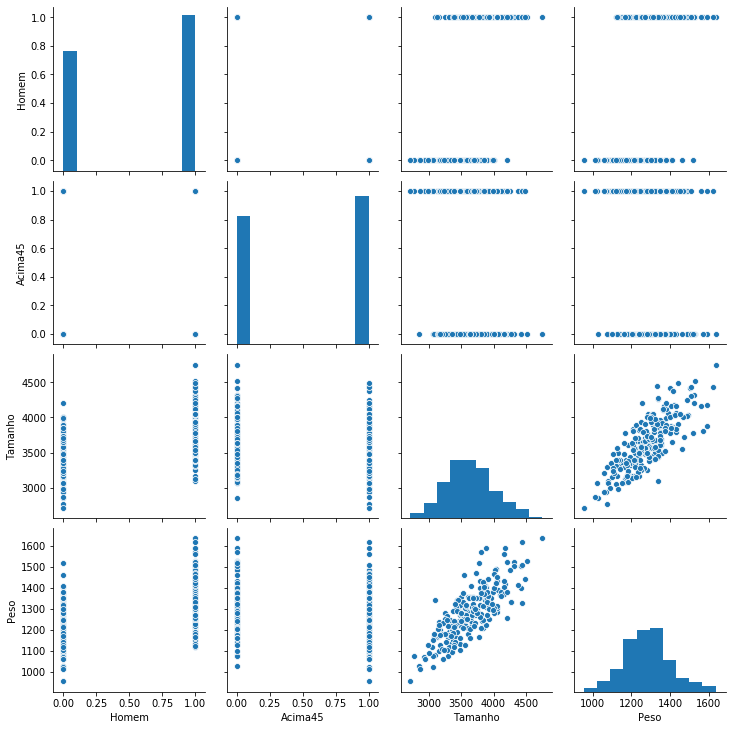

In [51]:
#Gráficos de dispersão entre todos os pares de variáveis e histogramas
sns.pairplot(data ,diag_kind='hist')
plt.show()

In [31]:
data.corr()

,Homem,Acima45,Tamanho,Peso
Homem,1.000000,0.088652,0.514050,0.465266
Acima45,0.088652,1.000000,-0.105428,-0.169438
Tamanho,0.514050,-0.105428,1.000000,0.799570
Peso,0.465266,-0.169438,0.799570,1.000000


É possível observar uma forte relação entre a variável preditora Tamanho e a variável resposta Peso (80%), o que sugere que de fato ela é um bom preditor da variável Peso. 

Entre as preditoras, destacamos a relação entre Tamanho e Homem (51%), o que poderia gerar um problema de multicolinearidade. 

Vamos iniciar a criação do modelo com todas as variáveis e interações possíveis e através da técnica de stepwise, iremos adequar e otimizar o modelo final, eliminando as variáveis ou interações não significativas. Após ajustarmos o modelo, vamos aplicar mais algumas técnicas para analisar com maiores detalhes as questões de multicolinearidade e verificar se há diferença na relação Tamanho e Peso quando consideramos grupo etário e gênero.

In [53]:
#regressão linear múltipla
#Modelo 2: Tamanho, Homem e Acima45 com todas as interações possíveis

mod2 = ols('Peso ~ Tamanho * Homem * Acima45',data=data)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     63.68
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.90e-50
Time:                        17:35:25   Log-Likelihood:                -1343.0
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     229   BIC:                             2730.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               399.89

Vamos analisar a interação Tamanho:Homem:Acima45.

Neste caso, temos um teste de hipótese que considera:<br> 
$H_0$: $\beta_0$ = 0 <br>
$H_a$: $\beta_0$ $\neq$ 0 <br> 

Com um p-valor de 90%, coeficiente de regressão 0.0076 e intervalo de confiança entre -0.115 e 0.130, nós aceitamos a hipótese que $\beta_0$ = 0 no modelo, portanto, esta interação torna-se insignificante e será retirada. 

Vamos continuar aplicando a técnica de stepwise para a seleção das demais variáveis para melhorarmos o modelo final.

In [55]:
#regressão linear múltipla
#Modelo 3: Tamanho, Homem, Acima45 e respectivas interações

mod3 = ols('Peso ~ Tamanho * Homem + Tamanho * Acima45 + Homem * Acima45',data=data)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     74.60
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           3.24e-51
Time:                        17:36:42   Log-Likelihood:                -1343.1
No. Observations:                 237   AIC:                             2700.
Df Residuals:                     230   BIC:                             2724.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         408.7992    102.157     

Analisando a interação Tamanho:Homem, temos p-valor > 0.05 e intervalo de confiança que pode assumir o valor 0. Com isso, também aceitamos a hipótese de $\beta_0$ = 0, retirando-o do modelo.

In [58]:
#regressão linear múltipla
#Modelo 4: Tamanho, Homem, Acima45. Interações Tamanho - Acima45 e Homem - Acima45

mod4 = ols('Peso ~ Tamanho + Tamanho * Acima45 + Homem * Acima45',data=data)
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     88.96
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           7.24e-52
Time:                        17:46:27   Log-Likelihood:                -1343.9
No. Observations:                 237   AIC:                             2700.
Df Residuals:                     231   BIC:                             2721.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         493.1839     77.814     

Considerando a mesma análise anterior (p-valor > 0.05 e IC inclui o zero), iremos retirar a interação Homem:Acima45.

In [59]:
#regressão linear múltipla
#Modelo 5: Tamanho, Homem, Acima45. Interação: Tamanho - Acima45.

mod5 = ols('Peso ~ Tamanho + Homem + Tamanho * Acima45',data=data)
res5 = mod5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     110.0
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.05e-52
Time:                        17:47:13   Log-Likelihood:                -1345.1
No. Observations:                 237   AIC:                             2700.
Df Residuals:                     232   BIC:                             2717.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         453.0924     73.463     

Considerando a mesma análise anterior (p-valor > 0.05 e IC inclui o zero), iremos retirar a interação Tamanho:Acima45.

In [60]:
#regressão linear múltipla
#Modelo 6: Tamanho, Homem, Acima45 e sem interações

mod6 = ols('Peso ~ Tamanho + Homem + Acima45',data=data)
res6 = mod6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.94e-53
Time:                        17:48:59   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    395.5079     52.999      7.463      0.0

Para este último modelo temos um p-valor < 0.05, com coeficientes de regressão e IC que não incluem o valor 0, portanto, rejeitamos a hipótese $\beta_0$ = 0 e não iremos retirar mais variáveis. 

##### Multicolinearidade:
Voltando com as suspeitas de multicolinearidade identificadas no início da análise, iremos utilizar o cálculo do fator de inflação da variância (VIF) para as variáveis explicativas do modelo. O critério a ser utilizado para análise do VIF será:
* VIF for igual à 1 não há multicolinearidade entre os fatores;
* VIF acima de 1, as preditoras podem estar correlacionadas. 
  * De 1 até 5: indica alguma correlação, porém, não o suficiente para impactar no modelo;
  * De 5 até 10: alta correlação podendo gerar impacto no modelo; 
  * Acima de 10: coeficientes de regressão estão mal estimados devidos à multicolinearidade; 
  
  fonte: https://blog.minitab.com/pt/basta-lidando-com-a-multicolinearidade-na-analise-de-regressao

In [131]:
#calcula o VIF

var = res6.model.exog
vif = [variance_inflation_factor(var, i) for i in range(var.shape[1])]

print('|==================|==============================|')
print('|     Variáveis    |              VIF             |')
print('|------------------|------------------------------|')
print('|   Intercept','     |    ',vif[0],'      |',)
print('|   Tamanho','       |    ',vif[1],'       |',)
print('|   Homem','         |    ',vif[2],'      |',)
print('|   Acima45','       |    ',vif[3],'      |',)
print('|------------------|------------------------------|')

|==================|==============================|
|     Variáveis    |              VIF             |
|------------------|------------------------------|
|   Intercept      |     130.72596546224784       |
|   Tamanho        |     1.402975195652195        |
|   Homem          |     1.3983710653327666       |
|   Acima45        |     1.0404193672560635       |
|------------------|------------------------------|


Para as variáveis Tamanho, Homem e Acima45 os valores do VIF indicam que temos alguma correlação, porém, ela não é forte o suficiente para impactar no modelo. Para o Intercepto tivemos um VIF bem alto, porém, para podermos aplicar a remoção do mesmo, devemos primeiro padronizar as variáveis preditoras e de resposta, com isso o intercepto passará pela origem (0,0). Essa abordagem dificulta a interpretação das variáveis explicativas do modelo, portanto, para evitarmos complicar essa interpretação, uma outra abordagem é padronizar apenas a variável quantitativa (Tamanho) para tentarmos dar sentido ao Intercepto e tentar eliminar o VIF alto. 

In [130]:
#regressão linear múltipla
#Modelo 7: Tamanho, Homem, Acima45, sem interações, com Tamanho padronizado

#padronização (variável menos média dividido pelo desvio padrão)
Tamanho_p = (data.Tamanho-np.mean(data.Tamanho))/(np.std(data.Tamanho))

mod7 = ols('Peso ~ Tamanho_p + Homem + Acima45',data=data)
res7 = mod7.fit()
print(res7.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.94e-53
Time:                        20:21:53   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1282.9713      8.703    147.412      0.0

In [129]:
#calcula o VIF para o modelo 7

var = res7.model.exog
vif = [variance_inflation_factor(var, i) for i in range(var.shape[1])]

print('|==================|==============================|')
print('|     Variáveis    |              VIF             |')
print('|------------------|------------------------------|')
print('|   Intercept','     |    ',vif[0],'      |',)
print('|   Tamanho_p','     |    ',vif[1],'       |',)
print('|   Homem','         |    ',vif[2],'      |',)
print('|   Acima45','       |    ',vif[3],'      |',)
print('|------------------|------------------------------|')

|==================|==============================|
|     Variáveis    |              VIF             |
|------------------|------------------------------|
|   Intercept      |     3.5253225566754294       |
|   Tamanho_p      |     1.402975195652195        |
|   Homem          |     1.3983710653327661       |
|   Acima45        |     1.0404193672560633       |
|------------------|------------------------------|


Com estes resultados para o VIF, temos a indicação que existe alguma correlação entre as variáveis, porém, ela não é suficiente para impactar no modelo, portanto, vamos considerar esse como sendo o modelo final ajustado. 

As suposições do nosso modelo ajustado precisam ser validadas para que os resultados sejam confiáveis, para isso vamos realizar a análise de resíduos. A idéia por trás é que se o modelo for apropriado, os resíduos devem refletir algumas propriedades:

i. $ \varepsilon_i $ e $ \varepsilon_j $ são independentes $ (i\neq j) $;

ii. $ Var(\varepsilon_i) = \sigma^2 $ (constante);

iii. $ \varepsilon_i \sim N(0,\sigma^2) $ (normalidade);

iv. Modelo é linear;

v. Não existir outliers (pontos atípicos) influentes.

fonte: http://www.portalaction.com.br/analise-de-regressao/analise-dos-residuos

In [134]:
# obtendo parâmetros no modelo 7, modelo final ajustado

# valores preditos de E(Y)
ypred=res7.fittedvalues

# objeto para a análise de pontos influentes
infl = res7.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,k) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

In [148]:
# diagnóstico de independência

#teste de durbin watson
print('Estatística de Durbin Watson:',durbin_watson(res7.resid,axis=0))

Estatística de Durbin Watson: 1.9224232061579223


Este teste serve para detectar dependência nos resíduos de uma análise de regressão. A estatística do teste sempre irá varias entre 0 e 4. Quanto mais próximo de 0, maior a evidência de uma correlação positiva e quanto mais próxima de 4, correlação negativa. Uma estatística próxima de 2, indica que não temos correlação nos resíduos, ou seja, são independentes.

Neste caso, a estatística obtida está próxima de 2 (1.92), logo, não temos dependência.

fonte: https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

Observações mais críticas:
Int64Index([], dtype='int64') Int64Index([43, 102], dtype='int64')


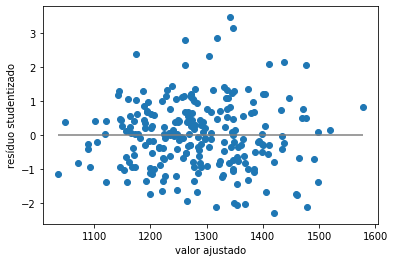

In [143]:
# diagnóstico de homoscedasticidade (variância constante)

plt.scatter(ypred,res_stud) # gráfico dos resíduos versus valores ajustados (valores preditos)
plt.ylabel('resíduo studentizado')
plt.xlabel('valor ajustado')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
print('Observações mais críticas:')
print(df.index[res_stud<-3],df.index[res_stud>3]) # identifica as observações mais críticas

Neste caso, os pontos estão aleatoriamente distribuídos em torno do zero, sem nenhum comportamento ou tendência, o comportamento é o esperado para distribuição dos erros e há indícios de que a variância dos resíduos é homoscedástica.

Importante notar que algumas observações cujo o valor do resíduo studenizado é maior que 3 são apresentadas como críticas. Estes valores são 43 e 102.

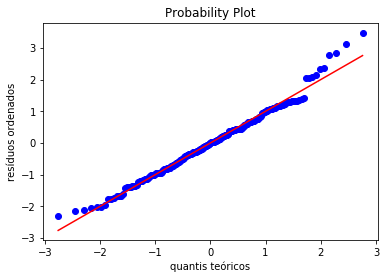

Int64Index([14, 35, 50, 62, 95, 121], dtype='int64') Int64Index([4, 18, 43, 57, 64, 102, 109, 161, 162, 224], dtype='int64')


In [139]:
# diagnóstico de normalidade

probplot(res_stud, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()
print(data.index[res_stud<-2],data.index[res_stud>2])

Para este teste esperamos que caso a suposição de normalidade esteja adequada, o comportamento dos pontos tem que ser linear. Graficamente observamos que os pontos seguem o comportamento da reta (não estão tão distantes dela), porém, algumas observações com resíduos studentizados abaixo de -2 e acima de 2 parecem ser as responsáveis pela fuga da normalidade dos dados. Tais observações são: 14, 35, 50, 62, 95, 121 e 4, 18, 43, 57, 64, 102, 109, 161, 162, 224, respectivamente.

Int64Index([], dtype='int64')


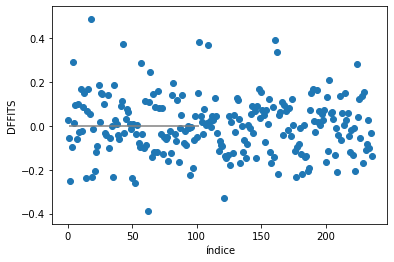

In [152]:
# pontos influentes (DFFITS e distância de cook)

#dffits
plt.scatter(data.index, dffits)
plt.ylabel('DFFITS')
plt.hlines(0,xmin=1,xmax=102,color='gray')
plt.xlabel('índice')
print(df.index[dffits>1]) # valores que estão acima de 1

O DFFITS mede a influência que a observação i tem sobre seu próprio valor ajustado. Uma observação é um ponto influente, se:
* $ |DFFITS_{(i)}|~>~ 1 $, para amostras pequenas ou médias
* $ |DFFITS_{(i)}|~>~ 2\sqrt{(p+1)/n} $, para amostras grandes, no qual $ (p+1) $ é o número de parâmetros.

Neste caso, não temos valores que estão acima de 1, portanto, não temos pontos influentes.

fonte: http://www.portalaction.com.br/analise-de-regressao/343-pontos-influentes

Int64Index([], dtype='int64')


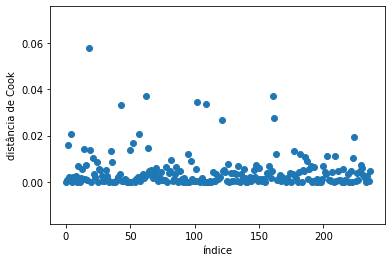

In [153]:
#distância de cook
plt.scatter(data.index, cook)
plt.ylabel('distância de Cook')
plt.xlabel('índice')
print(data.index[cook>f.ppf(.5, 5, 126)]) # valores que estão acima do percentil 50 de uma distribuição F(p,n-p)

A distância de Cook mede a influência da observação i sobre todos n valores ajustados. Uma observação é um ponto influente, se:
* $ D_i~>~1 $.

Neste caso, não temos valores que estão acima de 1, portanto, não temos pontos influentes.

fonte: http://www.portalaction.com.br/analise-de-regressao/343-pontos-influentes

Int64Index([], dtype='int64')


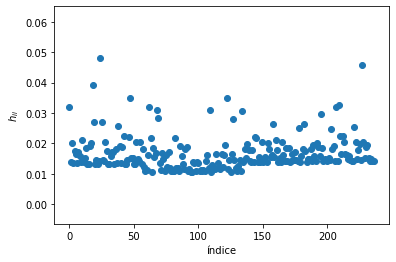

In [155]:
#diagonal da matriz chapéu
plt.scatter(data.index, hii)
plt.ylabel('$h_{ii}$')
plt.xlabel('índice')
print(data.index[hii>.1])   # h_ii>2p/n (neste caso, .1)

A diagonal da matriz chapéu $ H $ é uma medida padronizada da distância da i-ésima observação para o centro do espaço definido pelas variáveis explicativas. Uma observação é um ponto influente, se:
* $ h_{ii} > 2(p+1)/n $

Neste caso, não temos ocorrências destacadas.

fonte: http://www.portalaction.com.br/analise-de-regressao/341-ponto-de-alavanca

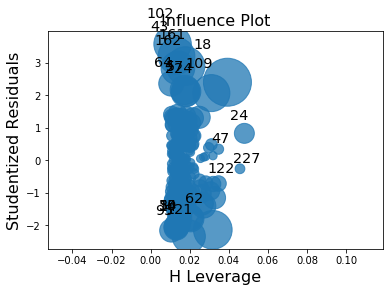

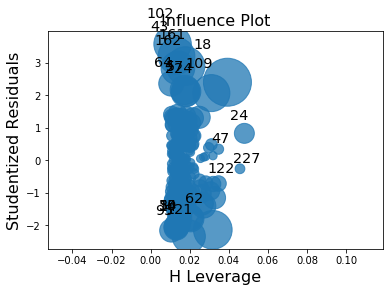

In [157]:
# Gráficos dos resíduos
sm.graphics.influence_plot(res7)

Considerando os resultados dos resíduos studentizados, pode-se observar alguns valores mais críticos como as observações de índices 43 e 102, porém, dado que os testes de pontos influentes não geraram ocorrências, decidimos por manter o modelo final sem alterações.

##### Seleção do Modelo Final:
Podemos confirmar a escolha do modelo final, comparando-se os índices AIC, BIC e  $𝑅^2_𝑎$ , conforme tabela abaixo. O modelo escolhido (número 7) foi um dos que apresentaram os melhores índices (maior  $𝑅^2_𝑎$  com os menores AIC, BIC) e, além disso, melhorou o problema de alto fator de inflação de variância (VIF).

Modelo | Variáveis                                               | AIC   | BIC   | $$R^2_a$$
-------|---------------------------------------------------------|-------|-------|--------
1      | tamanho                                                 | 2705  | 2711  | 63,8%
2      | tamanho, homem, acima45, todas as interações            | 2702  | 2730  | 65,0%
3      | tamanho, homem, acima45, interações de 1a ordem         | 2700  | 2724  | 65,2%
4      | tamanho, homem, acima45, tamanho*acima45, homem*acima45 | 2700  | 2721  | 65,1%
5      | tamanho, homem, acima45, tamanho*acima45                | 2700  | 2717  | 64,9%
6      | tamanho, homem, acima45, sem interações                 | 2699  | 2713  | 64,8%
7      | tamanho_p, homem, acima45, sem interações               | 2699  | 2713  | 64,8%

In [176]:
#print do modelo final para análise e interpretação de resultados
print('Média Tamanho:',np.mean(data.Tamanho),'e Desvio Padrão Tamanho:',np.std(data.Tamanho))
print()
print(res7.summary())

Média Tamanho: 3633.9915611814345 e Desvio Padrão Tamanho: 364.49001411962064

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.94e-53
Time:                        04:14:26   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

#### Interpretação dos resultados:

1) Intercepto: 1282.97[g] é o valor esperado do peso cerebral para indíviduos do gênero feminino (homem = 0) com idade menor que 45 anos (acima45 = 0) e que tenham o tamanho da cabeça com valores de média e desvio padrão (3634[cm3] e 364[cm3], respectivamente).

2) Tamanho_p: 89[g] é o aumento esperado do peso cerebral para cada aumento no tamanho padronizado da cabeça[cm3], ou seja, esse crescimento padronizado é equivalente ao tamanho da cabeça multiplicado pelo desvio padrão menos sua média. E para estimar esse valor, devemos considerar indivíduos de um mesmo gênero (seja ele qual for) e uma mesma faixa etária (maior que 45 anos ou menor que 45 anos).

3) Homem: 22.5[g] é quanto o peso cerebral de um indivíduo irá variar quando considerarmos apenas seu gênero (masculino ou feminino) para um mesmo tamanho de cabeça com valores de média e desvio padrão (3634[cm3] e 364[cm3], respectivamente) e para uma mesma faixa etária (classificada em maior que 45 anos ou menor que 45 anos).  

4) Acima45: -23.9[g] é quanto o peso cerebral de um indivíduo irá variar quando considerarmos apenas sua faixa etária (maior que 45 anos ou menor que 45 anos) para um mesmo tamanho de cabeça com valores de média e desvio padrão (3634[cm3] e 364[cm3], respectivamente) e para um mesmo gênero (seja ele qual for).  

### O tamanho da cabeça é preditor do peso cerebral...

Sim. 

Olhando para o modelo 1, onde temos apenas o tamanho da cabeça como variável preditora, observamos um $R^2_{ajustado}$ = 63.8%, ou seja, apenas essa variável consegue explicar mais de 60% dos valores obtidos para o peso do cérebro, logo, ele pode ser considerado sim um preditor de peso.

### ...e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários?

Ao considerarmos as variáveis gênero e faixa etária como parte do modelo final, podemos concluir que existe sim uma relação que ajuda a explicar um pouco da variável resposta peso do cérebro, porém, algumas considerações podem ser feitas para entendermos qual o impacto que elas geram na estimativa da variável resposta e entender se há uma diferença significativa nos resultados. 

##### Entre os sexos:
O peso médio cerebral da nossa amostra é cerca de 1282[g] e o $\beta$ do modelo apresenta um valor de 22[g], ou seja, ele é um percentual muito pequeno do peso cerebral, logo, isso indica que ele não gera muito impacto no resultado caso o indivíduo seja homem ou mulher. Além disso, temos também um intervalo de confiança variando de 0.7 até 44, que também não nos diz muita coisa, uma vez que gera uma incerteza muito grande e diminui nossa confiança na variável estimada.

Portanto, concluímos que para os resultados encontrados na predição do peso a diferença devido ao gênero não é significativa. 

##### Entre os grupos etários:
Podemos fazer uma análise similar para o caso dos grupos etários. O $\beta$ do modelo indica um percentual pequeno na variação do peso cerebral se o indivíduo estiver acima ou abaixo dos 45 anos. Analisando o intervalo de confiança (-42 até -5), também gera incerteza e pouca confiança na variável.

Portanto, concluímos novamente que para os resultados encontrados na predição do peso a diferença devido à faixa etária não é significativa.


##### Resumo:

Em resumo, temos que o tamanho da cabeça é o principal preditor do peso do cérebro e que, apesar do gênero e faixa etária terem uma relação que explica um pouco da variável resposta, seus valores não são significativos o suficiente para gerar uma diferença nos resultados do modelo.

### 3) Estime o peso médio do cérebro de homens e de mulheres (pontual e intervalar).

Como estamos trabalhando com amostras, iremos utilizar os estimadores de parâmetros para verificar o peso médio do cérebro. Para a estimação pontual iremos utilizar o método da máxima verossimilhança (MV).

Como vimos que os dados para homens e mulheres são variáveis independentes e com distribuição normal N($\mu,\sigma^2$), temos que os estimadores são:

$$
\hat{\mu} = \bar{X}
$$

$$
\hat{\sigma}^2 = \sum_{i=1}^n{(X_i - \bar{X})^2 \over n}
$$

Com isso, a estimativa do peso médio pontual será dado pela própria média amostral:

In [16]:
#cálculo do estimador u_chapéu

print('|----------Estimador-Pontual---------|')
print('|                                    |')
print('|----Sexo----|----Média-Estimada-----|')
print('|    Homem   |',' ',peso_homem.describe()[1],'  |')
print('|    Mulher  |',' ',peso_mulher.describe()[1],' |')
print('|------------------------------------|')

|----------Estimador-Pontual---------|
|                                    |
|----Sexo----|----Média-Estimada-----|
|    Homem   |   1331.858208955224   |
|    Mulher  |   1219.1456310679612  |
|------------------------------------|


Para estimação intervalar iremos utilizar a quantidade pivotal com variância populacional desconhecida. 

Assim:

$$
{\bar{X} - \mu \over {S \over \sqrt[]{n}}} \text { ~ } t_{(n-1)}
$$

onde S: desvio-padrão amostral e distribuição t com n-1 graus de liberdade.

Construiremos o intervalo de confiança de (1-$\alpha$) = 0.95 para a média: $IC_{\mu}$(95%). 

Logo, temos:

$$
P(\text{?} \leq {\bar{X} - \mu \over {S \over \sqrt[]{n}}} \leq \text{?}) \text{ = } 0.95
$$


In [177]:
#definição do valor do intervalo de confiança para 95%

print('Intervalo à esquerda da curva:',norm.ppf(0.025))
print('Intervalo à direita da curva:',norm.ppf(0.975))

Intervalo à esquerda da curva: -1.9599639845400545
Intervalo à direita da curva: 1.959963984540054


Aplicando os ajustes para obtermos o intervalo de confiança da média:

* multiplicar por: $\sigma \over \sqrt[]{n}$

* subtrair: $\bar{X}$

* multiplicar por (-1), invertendo o sinal da inequação

$$
P(\bar{X} - {1.96 \cdot S \over \sqrt[]{n}}  \leq \mu \leq \bar{X} + {1.96 \cdot S \over \sqrt[]{n}}) \text{ = } 0.95
$$

O cálculo do intervalo será executado pela função do Python DescrStatsW, com os seguintes parâmetros:
* $\alpha$ = 0.05

In [183]:
#cálculo do intervalo de confiança

ic_peso_homem = sms.DescrStatsW(peso_homem).tconfint_mean(alpha=0.05)
ic_peso_mulher = sms.DescrStatsW(peso_mulher).tconfint_mean(alpha=0.05)

print('|----------------------Estimador-Intervalar---------------------|')
print('|                                                               |')
print('|----Sexo-----|----Limite-Inferior-----|----Limite-Superior-----|')
print('|    Homem    |',' ',ic_peso_homem[0],'  |  ',ic_peso_homem[1],'  |')
print('|    Mulher   |',' ',ic_peso_mulher[0],'  |  ',ic_peso_mulher[1],'  |')
print('|---------------------------------------------------------------|')

|----------------------Estimador-Intervalar---------------------|
|                                                               |
|----Sexo-----|----Limite-Inferior-----|----Limite-Superior-----|
|    Homem    |   1313.2447792718747   |   1350.4716386385733   |
|    Mulher   |   1198.8531509366069   |   1239.4381111993155   |
|---------------------------------------------------------------|
